In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#import umap
import glob
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PyAstronomy import pyasl
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#df0=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset0_smoothed.csv', sep=',',  index_col=0)
#df1=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset1_smoothed.csv', sep=',',  index_col=0)
#df2=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset2_smoothed.csv', sep=',',  index_col=0)
#df3=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\Compiled_Data\dataset3_smoothed.csv', sep=',',  index_col=0)

#total_data_df = pd.concat([df0, df1, df2, df3], ignore_index=True)

df = pd.read_csv(r'df_with_freezed_clusters.csv', sep=',',  index_col=0)

In [3]:
df.head()

fDie1wflow_en0  fDie1wflow_en1  fDie1wflow_en2  fDie1wflow_en3  \
0       21.692999        0.759790       -0.968287       13.580341   
1       22.802261        1.165540       -0.969840       15.000215   
2       23.670288        1.490633       -0.969832       15.979490   
3       23.920792        2.118496       -0.968945       15.828067   
4       24.256344        2.081036       -0.970542       16.486008   

   fDie1wflow_en4  fDie1wflow_mse  fDie1wflow_mae  fDie2wflow_en0  \
0       -0.567633        0.002722        0.038137        9.908647   
1       -0.767543        0.002549        0.035166        9.719274   
2       -0.831797        0.002225        0.031885        9.586231   
3       -0.853646        0.001940        0.026800        9.413850   
4       -0.890179        0.001000        0.020291        9.127824   

   fDie2wflow_en1  fDie2wflow_en2      ...        tiebar_en14  tiebar_en15  \
0        1.283877       -0.999141      ...          -0.611454    -0.387602   
1        1.268317       -0.999214      ...          -0.606745    -0.379443   
2        0.992506       -0.999257      ...          -0.604088    -0.373460   
3        0.393041       -0.999068      ...          -0.586925    -0.352818   
4        0.392960       -0.999210      ...          -0.595761    -0.323802   

   tiebar_mse  tiebar_mae         Part  defect  defect_smoothed  max_ratio  \
0    0.002732    0.035002  B1012-278-1       0              0.0        0.0   
1    0.002792    0.035812  B1012-278-1       0              0.0        0.0   
2    0.002860    0.037235  B1012-278-1       0              0.0        0.0   
3    0.002696    0.037237  B1012-278-1       0              0.0        0.0   
4    0.002910    0.039074  B1012-278-1       0              0.0        0.0   

   min_ratio  cluster_label  
0        0.0              3  
1        0.0              3  
2        0.0              3  
3        0.0              6  
4        0.0              6  

[5 rows x 282 columns]

In [4]:
total_data_df.head()
deft=total_data_df['defect']
cav1_deft=total_data_df['cav1_defect']
cav2_deft=total_data_df['cav2_defect']
defect_smoothed=total_data_df['defect_smoothed']
parts=total_data_df['Part']

In [4]:
#Fill nan values
np.unique(df.isnull().values)
#total_data_df.fillna(0,inplace=True)

array([False])

In [7]:
#feature and label creation
features_df = df.drop(['defect_smoothed','defect','Part', 'max_ratio', 'min_ratio', 'cluster_label'], axis=1)
#features_df = pd.get_dummies(features_df)
labels_df = df['defect']
features_df.head()
#features_df.shape
#labels_df.shape

fDie1wflow_en0  fDie1wflow_en1  fDie1wflow_en2  fDie1wflow_en3  \
0       21.692999        0.759790       -0.968287       13.580341   
1       22.802261        1.165540       -0.969840       15.000215   
2       23.670288        1.490633       -0.969832       15.979490   
3       23.920792        2.118496       -0.968945       15.828067   
4       24.256344        2.081036       -0.970542       16.486008   

   fDie1wflow_en4  fDie1wflow_mse  fDie1wflow_mae  fDie2wflow_en0  \
0       -0.567633        0.002722        0.038137        9.908647   
1       -0.767543        0.002549        0.035166        9.719274   
2       -0.831797        0.002225        0.031885        9.586231   
3       -0.853646        0.001940        0.026800        9.413850   
4       -0.890179        0.001000        0.020291        9.127824   

   fDie2wflow_en1  fDie2wflow_en2     ...      tiebar_en8  tiebar_en9  \
0        1.283877       -0.999141     ...        0.164571   -0.220633   
1        1.268317       -0.999214     ...        0.163898   -0.208653   
2        0.992506       -0.999257     ...        0.161683   -0.219915   
3        0.393041       -0.999068     ...        0.116511   -0.172960   
4        0.392960       -0.999210     ...        0.132451   -0.130176   

   tiebar_en10  tiebar_en11  tiebar_en12  tiebar_en13  tiebar_en14  \
0    -0.316769    -0.309381    -0.311415    -0.483169    -0.611454   
1    -0.316752    -0.310259    -0.312217    -0.477430    -0.606745   
2    -0.301952    -0.291866    -0.312139    -0.474928    -0.604088   
3    -0.343142    -0.325699    -0.322637    -0.462039    -0.586925   
4    -0.346805    -0.285870    -0.317911    -0.443705    -0.595761   

   tiebar_en15  tiebar_mse  tiebar_mae  
0    -0.387602    0.002732    0.035002  
1    -0.379443    0.002792    0.035812  
2    -0.373460    0.002860    0.037235  
3    -0.352818    0.002696    0.037237  
4    -0.323802    0.002910    0.039074  

[5 rows x 276 columns]

In [135]:
scaler = StandardScaler()
scaled_features_arr = scaler.fit_transform(features_df)
#print(scaled_features.shape)
scaled_features = pd.DataFrame(data=scaled_features_arr, 
                                           columns=features_df.columns.values)
df_scaled = scaled_features
df_scaled['Part'] = df['Part'].replace(df.Part.unique(), [1,2,3,4,5])
#df_scaled['Part']=df['Part']
df_scaled['defect']=df['defect']
df_scaled['cluster_label']=df['cluster_label']
#df_scaled = pd.get_dummies(df_scaled)


In [138]:
df_scaled.head()

fDie1wflow_en0  fDie1wflow_en1  fDie1wflow_en2  fDie1wflow_en3  \
0        0.287420       -1.984405       -0.176543        0.781733   
1        0.464678       -1.890963       -0.177172        0.905691   
2        0.603388       -1.816096       -0.177169        0.991184   
3        0.643418       -1.671504       -0.176810        0.977965   
4        0.697039       -1.680131       -0.177457        1.035404   

   fDie1wflow_en4  fDie1wflow_mse  fDie1wflow_mae  fDie2wflow_en0  \
0       -0.958545       -0.032222        0.274246        1.849172   
1       -1.037891       -0.033001        0.239322        1.793847   
2       -1.063394       -0.034464        0.200761        1.754978   
3       -1.072066       -0.035754        0.141008        1.704617   
4       -1.086567       -0.039995        0.064509        1.621054   

   fDie2wflow_en1  fDie2wflow_en2      ...        tiebar_en11  tiebar_en12  \
0        0.467022       -1.385980      ...           0.265524     0.478632   
1        0.463315       -1.386016      ...           0.263579     0.471968   
2        0.397607       -1.386038      ...           0.304351     0.472617   
3        0.254794       -1.385944      ...           0.229353     0.385406   
4        0.254774       -1.386014      ...           0.317642     0.424669   

   tiebar_en13  tiebar_en14  tiebar_en15  tiebar_mse  tiebar_mae  Part  \
0    -0.165832    -0.262346     0.498165   -0.266214   -1.072165     1   
1    -0.127239    -0.247158     0.547075   -0.260516   -1.001860     1   
2    -0.110410    -0.238588     0.582942   -0.253929   -0.878400     1   
3    -0.023730    -0.183229     0.706678   -0.269681   -0.878216     1   
4     0.099562    -0.211728     0.880619   -0.249168   -0.718728     1   

   defect  cluster_label  
0       0              3  
1       0              3  
2       0              3  
3       0              6  
4       0              6  

[5 rows x 279 columns]

<IPython.core.display.Javascript object>


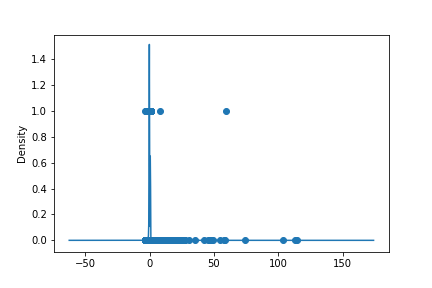

In [139]:
%matplotlib notebook
%matplotlib notebook
#%matplotlib inline


plt.figure(1)
#plt.plot(scaled_features['fDie1wflow_mse'], total_data_df['defect'],'r--')
plt.scatter(scaled_features['fDie1wflow_en0'], df['defect'])#, s=area, c=colors, alpha=0.5)
ax = scaled_features['fDie1wflow_en0'].plot.kde()
#plt.xlim(-5, 27)
plt.show()
plt.show()

In [17]:
df.groupby(df.defect).cluster_label.value_counts()

defect  cluster_label
0       0                32837
        2                28036
        4                15388
        5                 9074
        6                 8714
        7                 7133
        1                 2201
        3                 1581
1       4                  784
        2                  652
        0                  521
        5                  226
        6                  213
        7                  187
        3                   22
Name: cluster_label, dtype: int64

In [140]:
#groupby based on gmm labels(cluster output label,new_data is a list with 7 groups)
gb = df_scaled.groupby('cluster_label')    
new_data=[gb.get_group(x) for x in gb.groups]

In [141]:
data_label_0=new_data[0]
data_label_1=new_data[1]
data_label_2=new_data[2]
data_label_3=new_data[3]
data_label_4=new_data[4]
data_label_5=new_data[5]
data_label_6=new_data[6]
data_label_7=new_data[7]

In [142]:
#convert lists into seven dataframes
data_0 = pd.DataFrame(data_label_0) 
data_1= pd.DataFrame(data_label_1) 
data_2 = pd.DataFrame(data_label_2) 
data_3= pd.DataFrame(data_label_3)
data_4 = pd.DataFrame(data_label_4) 
data_5= pd.DataFrame(data_label_5)
data_6= pd.DataFrame(data_label_6)
data_7= pd.DataFrame(data_label_7)

In [40]:
def plot_target(df, x=0, y=1, target='defect'):
    sub_df0 = df[df[target] == 0]
    sub_df1 = df[df[target] == 1]
    data = (sub_df0, sub_df1)
    colors = ('C0', 'C1')
    group = ('good', 'defect')
    # create plot
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    for data_df, color, group in zip(data, colors, group):
        x_data = data_df.iloc[:, x].values
        y_data = data_df.iloc[:, y].values
        ax.scatter(x_data, y_data, alpha=0.5, c=color, s=20, label=group)
        
    plt.title(target+' distribution')
    plt.legend(loc='best')

#äplot_targets(data_5)

In [178]:
def plot_targets(df, x=0, y=1, target='Part'):
    sub_df0 = df[df[target] == 1 ]#'B1012-278-1']
    sub_df1 = df[df[target] == 2 ]#'B1022-278-1']
    sub_df2 = df[df[target] == 3 ]#'B1012-278-3']
    sub_df3 = df[df[target] == 4 ]#'B1012-278-4']
    sub_df4 = df[df[target] == 5 ]#'B1012-278-2']
    
    data = (sub_df0, sub_df1, sub_df2, sub_df3,sub_df4)
    colors = ('C0', 'C1', 'C2','C3','C4')
    group = ('B1012-278-1', 'B1022-278-1', 'B1012-278-3', 'B1012-278-4',
       'B1012-278-2')
    # create plot
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    for data_df, color, group in zip(data, colors, group):
        x_data = data_df.iloc[:, x].values
        y_data = data_df.iloc[:, y].values
        ax.scatter(x_data, y_data, alpha=0.5, c=color, s=20, label=group)
        
    plt.title(target+' distribution')
    plt.legend(loc='best')

#plot_targets(data_5)

In [37]:
df.Part.unique()

array(['B1012-278-1', 'B1022-278-1', 'B1012-278-3', 'B1012-278-4',
       'B1012-278-2'], dtype=object)

<IPython.core.display.Javascript object>


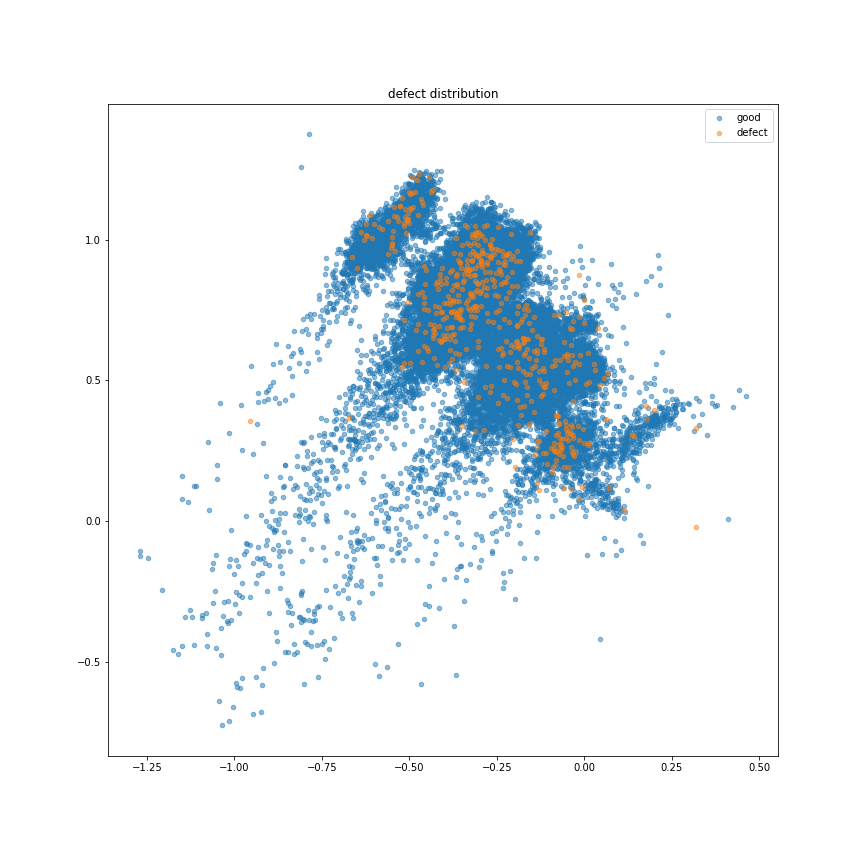

In [56]:
plot_target(data_0)

<IPython.core.display.Javascript object>


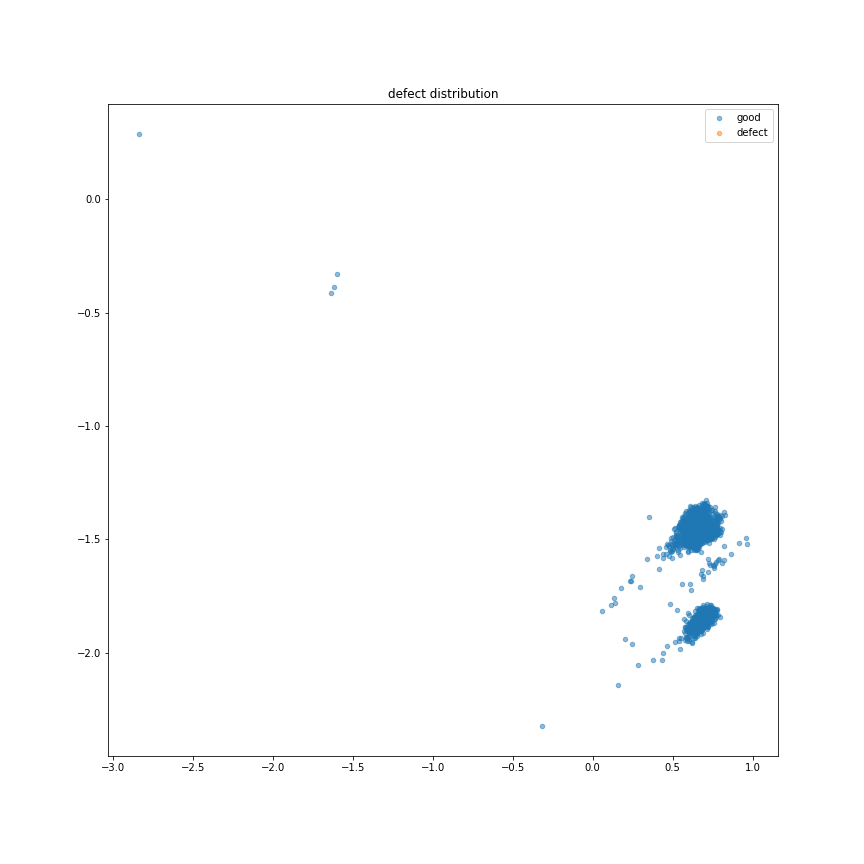

In [57]:
plot_target(data_1)

<IPython.core.display.Javascript object>


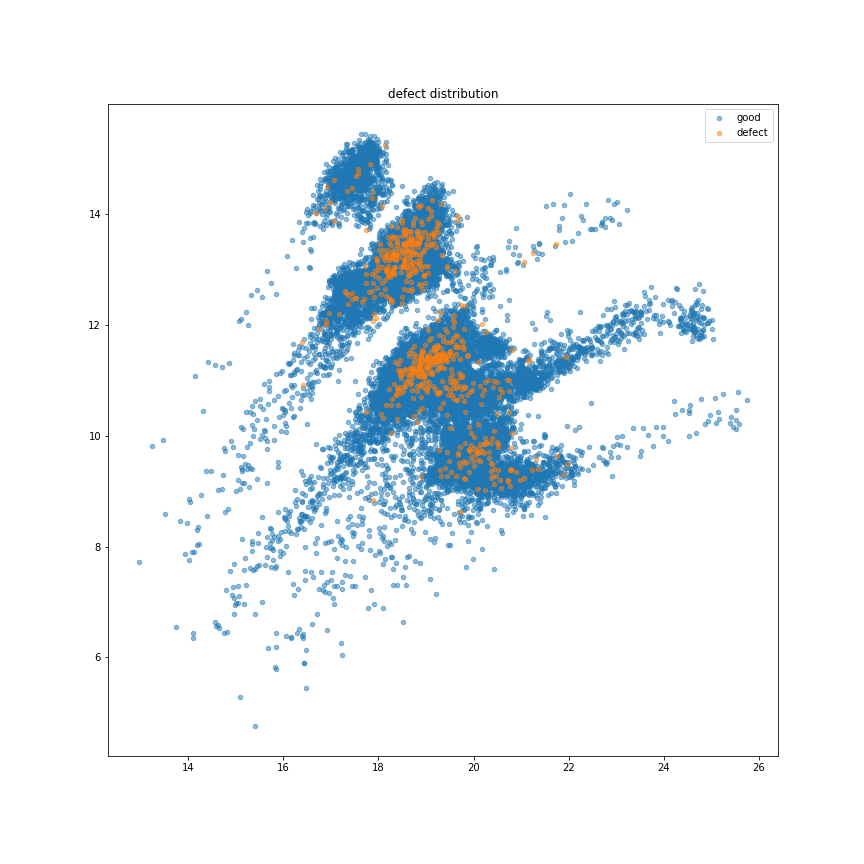

In [46]:
plot_target(data_2)

<IPython.core.display.Javascript object>


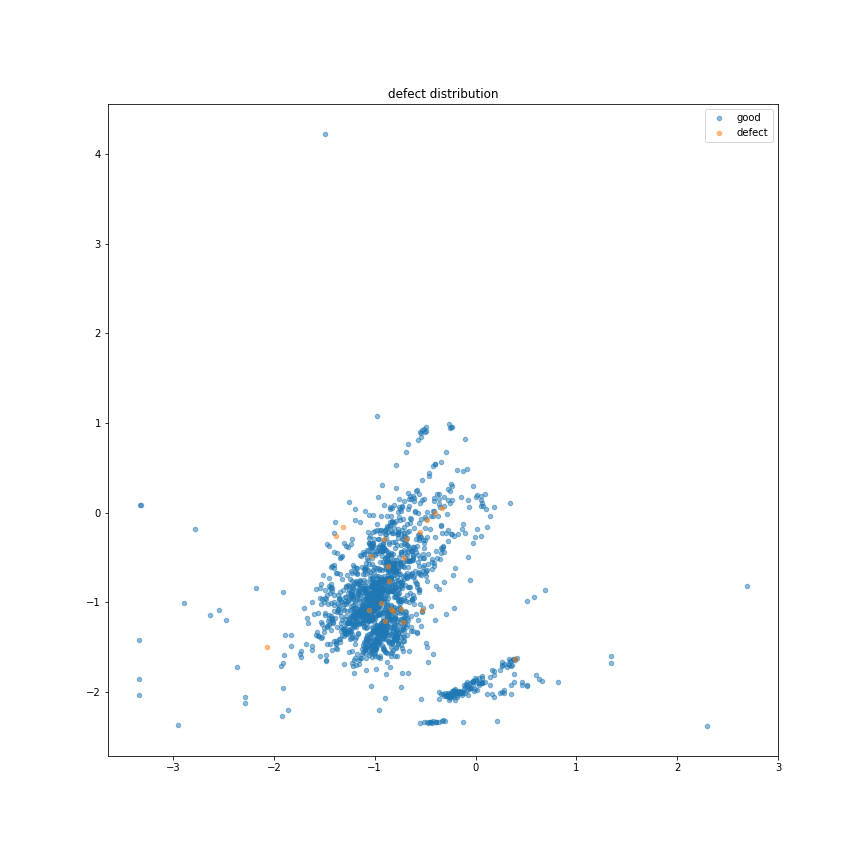

In [58]:
plot_target(data_3)

<IPython.core.display.Javascript object>


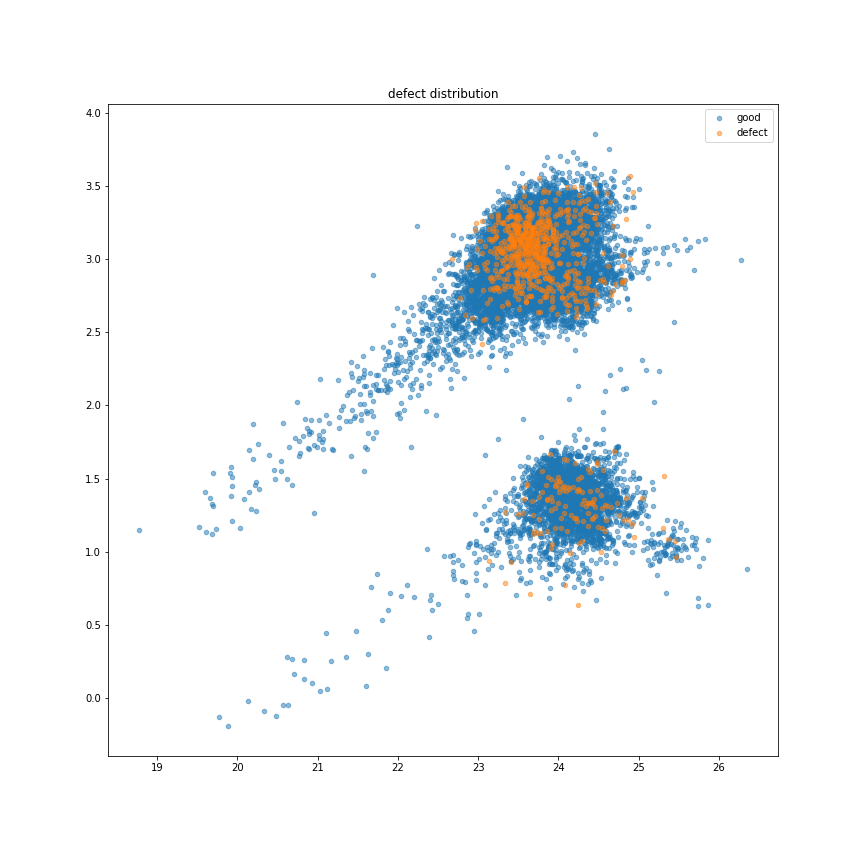

In [48]:
plot_target(data_4)

<IPython.core.display.Javascript object>


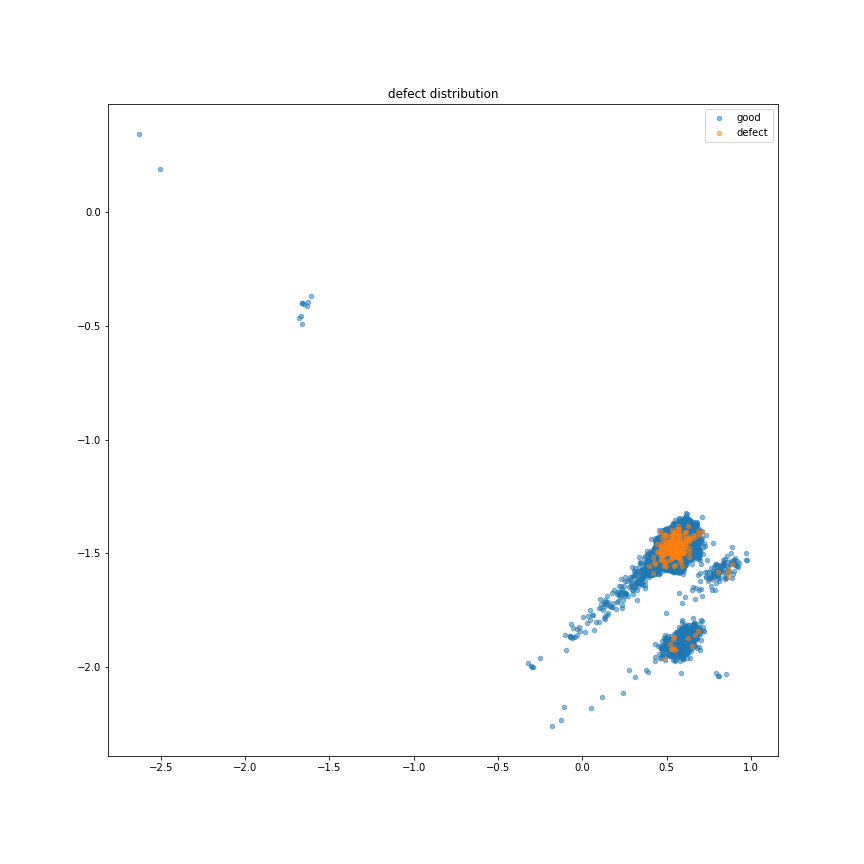

In [59]:
plot_target(data_5)

<IPython.core.display.Javascript object>


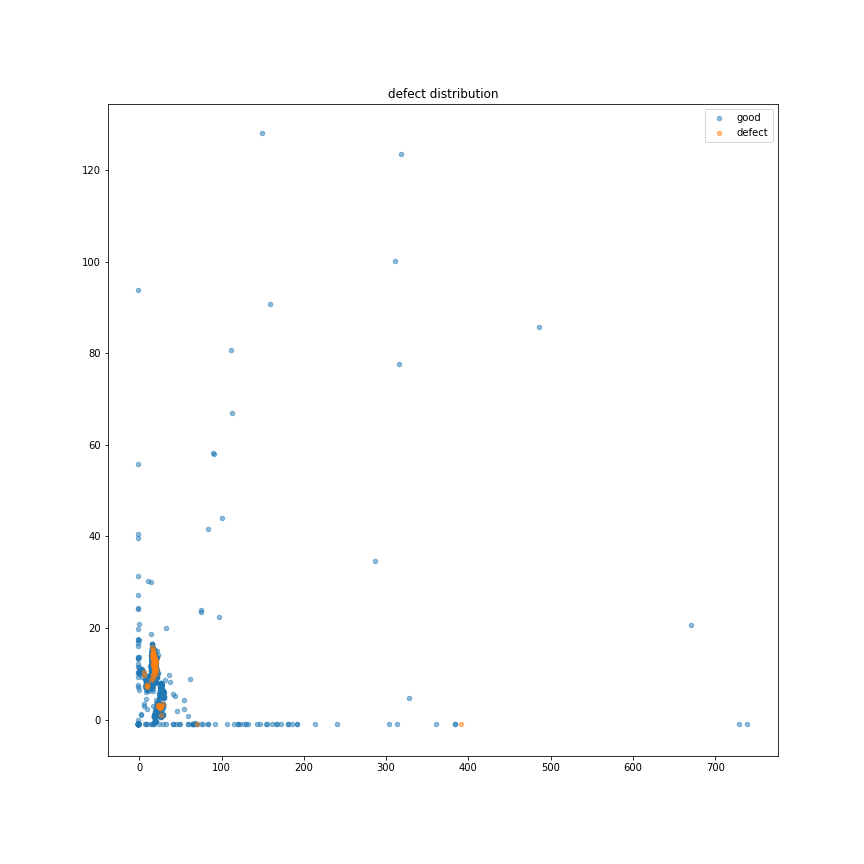

In [50]:
plot_target(data_6)

<IPython.core.display.Javascript object>


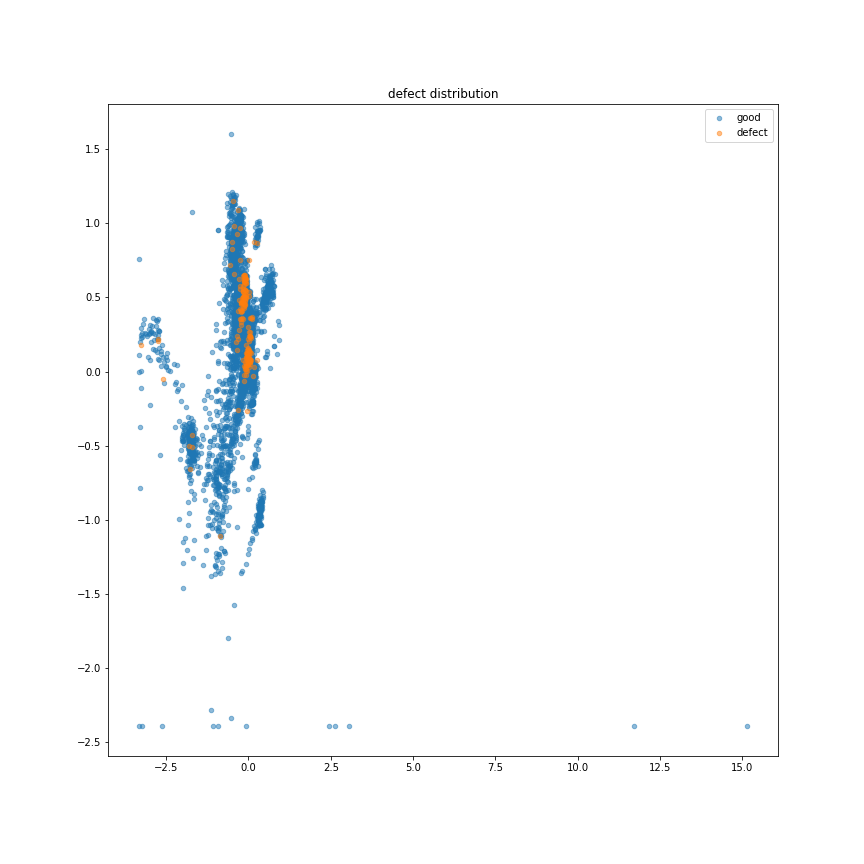

In [85]:
plot_target(data_7)

In [78]:
std_feats_0 = data_0.drop(['Part', 'defect', 'cluster_label'], axis=1).std()
std_feats_1 = data_1.drop(['Part', 'defect', 'cluster_label'], axis=1).std()
std_feats_2 = data_2.drop(['Part', 'defect', 'cluster_label'], axis=1).std()
std_feats_3 = data_3.drop(['Part', 'defect', 'cluster_label'], axis=1).std()
std_feats_4 = data_4.drop(['Part', 'defect', 'cluster_label'], axis=1).std()
std_feats_5 = data_5.drop(['Part', 'defect', 'cluster_label'], axis=1).std()
std_feats_6 = data_6.drop(['Part', 'defect', 'cluster_label'], axis=1).std()
std_feats_7 = data_6.drop(['Part', 'defect', 'cluster_label'], axis=1).std()


<IPython.core.display.Javascript object>


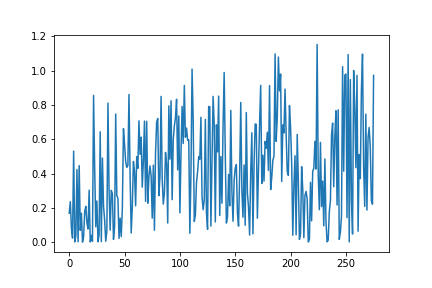

In [103]:
plt.figure(20)
#plt.hist(std_feats_0)
plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


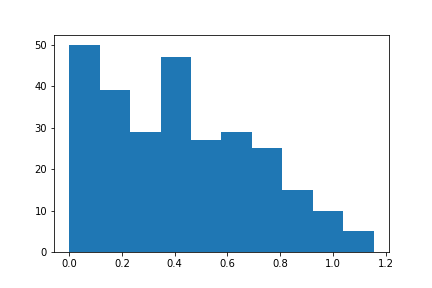

In [104]:
plt.figure(21)
plt.hist(std_feats_0)
#plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


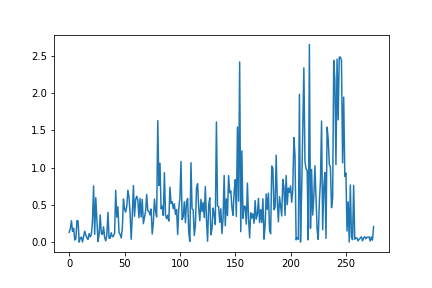

In [101]:
plt.figure(22)
#plt.hist(std_feats_0)
plt.plot(std_feats_1.values)
plt.show()

<IPython.core.display.Javascript object>


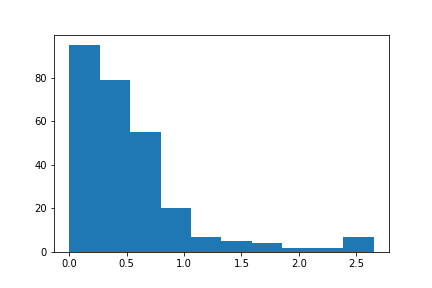

In [105]:
plt.figure(23)
plt.hist(std_feats_1)
#plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


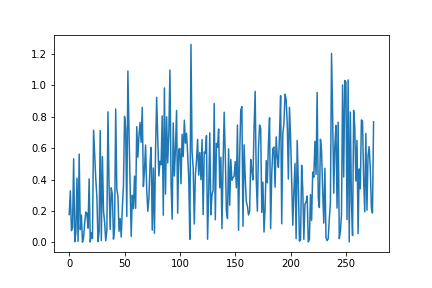

In [106]:
plt.figure(24)
#plt.hist(std_feats_0)
plt.plot(std_feats_2.values)
plt.show()

<IPython.core.display.Javascript object>


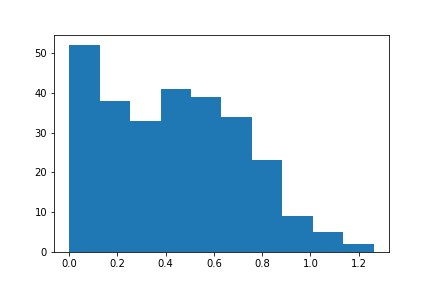

In [107]:
plt.figure(25)
plt.hist(std_feats_2)
#plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


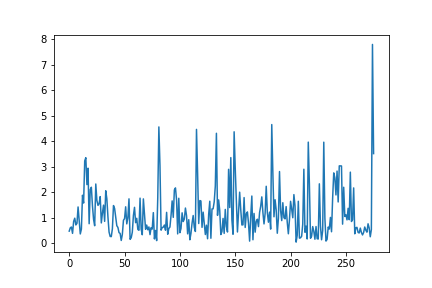

In [108]:
plt.figure(26)
#plt.hist(std_feats_0)
plt.plot(std_feats_3.values)
plt.show()

<IPython.core.display.Javascript object>


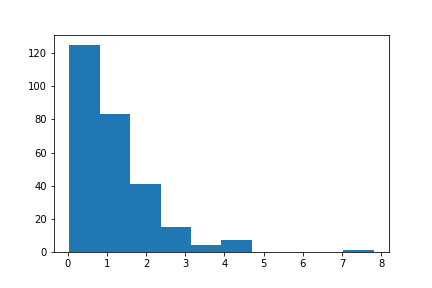

In [109]:
plt.figure(27)
plt.hist(std_feats_3)
#plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


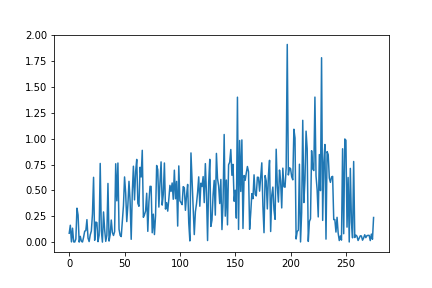

In [110]:
plt.figure(28)
#plt.hist(std_feats_0)
plt.plot(std_feats_4.values)
plt.show()

<IPython.core.display.Javascript object>


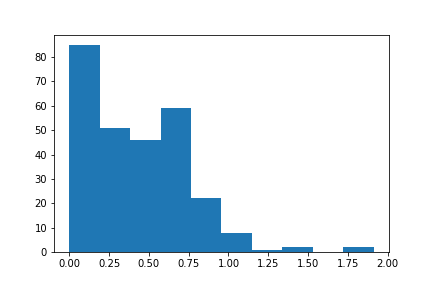

In [111]:
plt.figure(29)
plt.hist(std_feats_4)
#plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


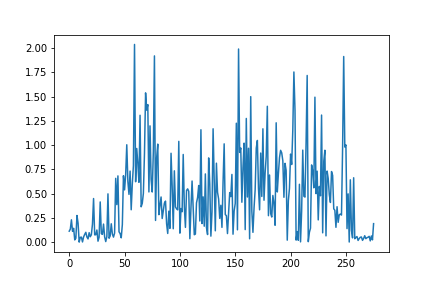

In [115]:
plt.figure(30)
#plt.hist(std_feats_0)
plt.plot(std_feats_5.values)
plt.show()

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


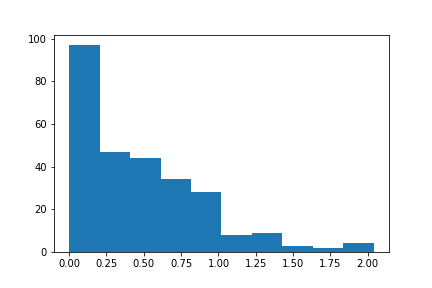

In [113]:
plt.figure(31)
plt.hist(std_feats_5)
#plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


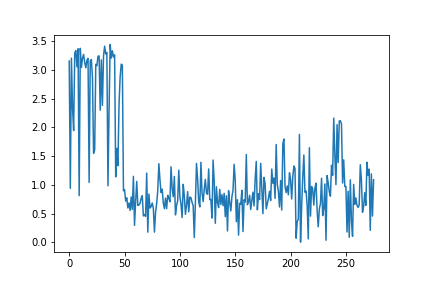

In [116]:
plt.figure(32)
#plt.hist(std_feats_0)
plt.plot(std_feats_6.values)
plt.show()

<IPython.core.display.Javascript object>


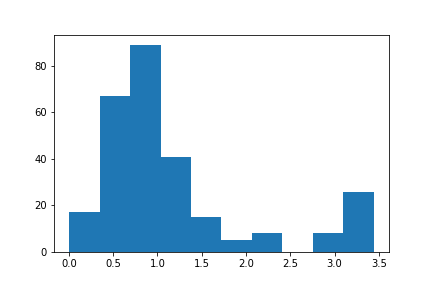

In [117]:
plt.figure(33)
plt.hist(std_feats_6)
#plt.plot(std_feats_0.values)
plt.show()

<IPython.core.display.Javascript object>


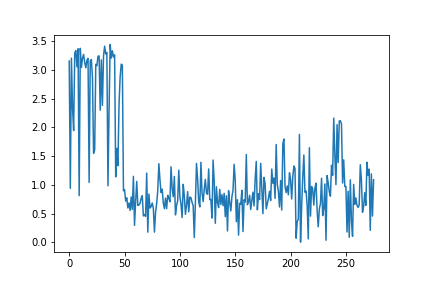

In [118]:
plt.figure(34)
#plt.hist(std_feats_0)
plt.plot(std_feats_7.values)
plt.show()

<IPython.core.display.Javascript object>


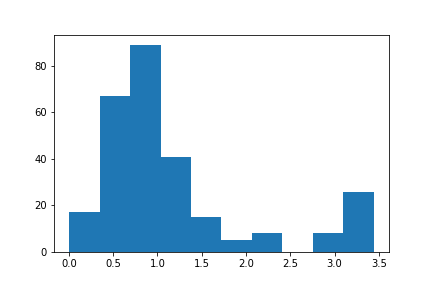

In [119]:
plt.figure(35)
plt.hist(std_feats_7)
#plt.plot(std_feats_0.values)

plt.show()

<IPython.core.display.Javascript object>


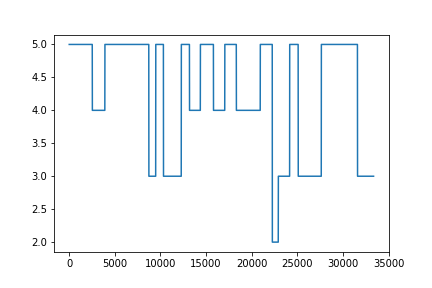

<function matplotlib.pyplot.show(*args, **kw)>

In [156]:
plt.figure(40)
plt.plot(range(len(data_0)), data_0.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


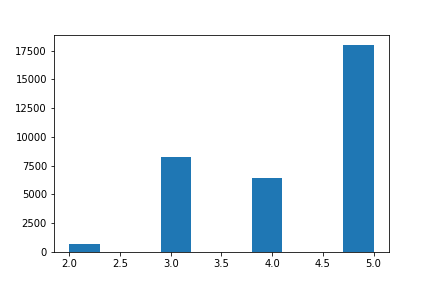

In [162]:
plt.figure(41)
plt.hist(data_0['Part'])
plt.show()

<IPython.core.display.Javascript object>


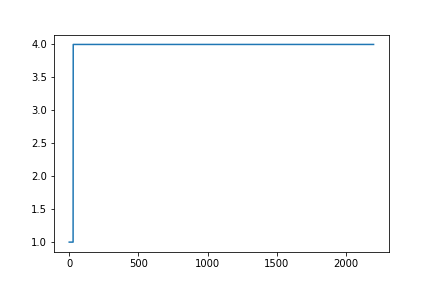

<function matplotlib.pyplot.show(*args, **kw)>

In [163]:
plt.figure(42)
plt.plot(range(len(data_1)), data_1.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


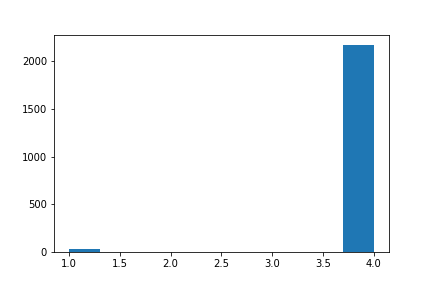

In [164]:
plt.figure(43)
plt.hist(data_1['Part'])
plt.show()

<IPython.core.display.Javascript object>


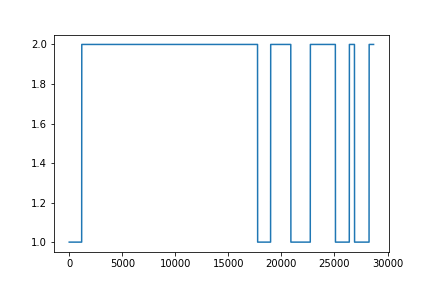

<function matplotlib.pyplot.show(*args, **kw)>

In [166]:
plt.figure(44)
plt.plot(range(len(data_2)), data_2.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


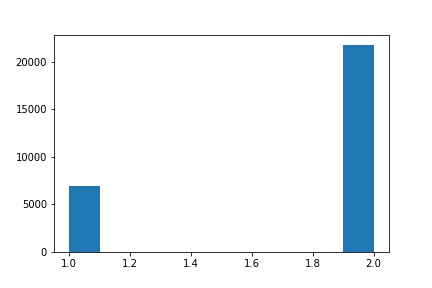

In [167]:
plt.figure(45)
plt.hist(data_2['Part'])
plt.show()

<IPython.core.display.Javascript object>


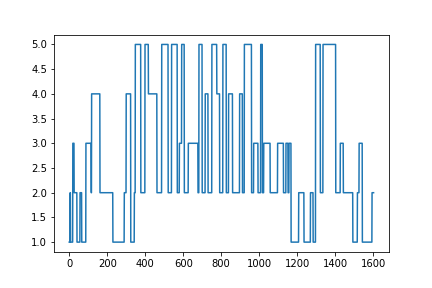

<function matplotlib.pyplot.show(*args, **kw)>

In [168]:
plt.figure(46)
plt.plot(range(len(data_3)), data_3.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


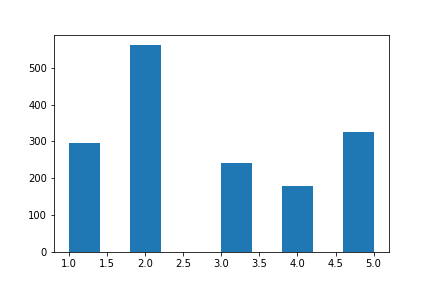

In [169]:
plt.figure(47)
plt.hist(data_3['Part'])
plt.show()

<IPython.core.display.Javascript object>


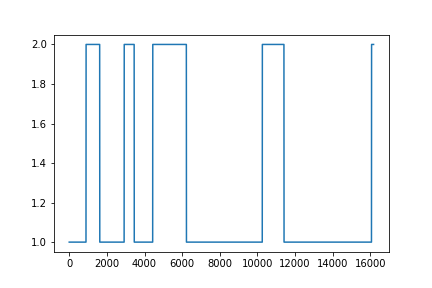

<function matplotlib.pyplot.show(*args, **kw)>

In [170]:
plt.figure(48)
plt.plot(range(len(data_4)), data_4.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


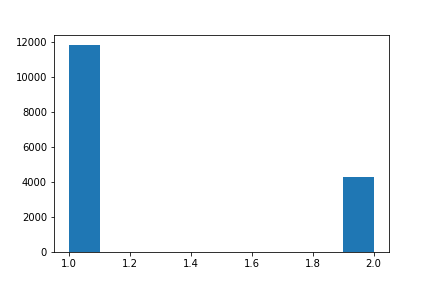

In [171]:
plt.figure(49)
plt.hist(data_4['Part'])
plt.show()

<IPython.core.display.Javascript object>


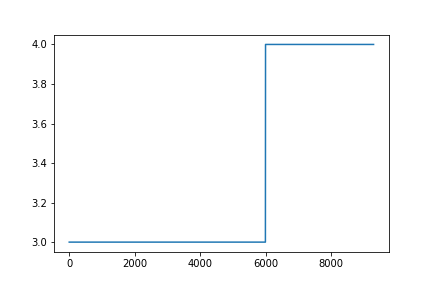

<function matplotlib.pyplot.show(*args, **kw)>

In [172]:
plt.figure(50)
plt.plot(range(len(data_5)), data_5.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


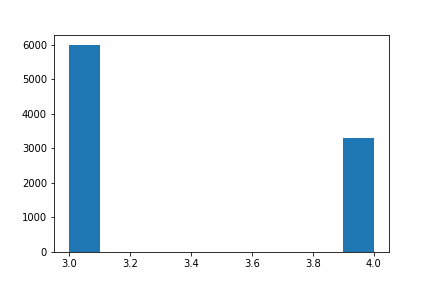

In [173]:
plt.figure(51)
plt.hist(data_5['Part'])
plt.show()

<IPython.core.display.Javascript object>


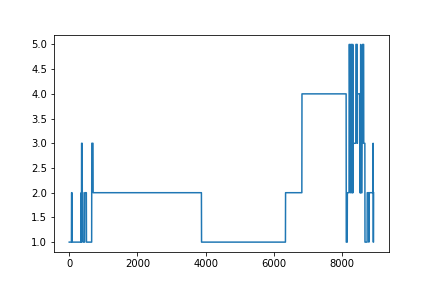

<function matplotlib.pyplot.show(*args, **kw)>

In [174]:
plt.figure(52)
plt.plot(range(len(data_6)), data_6.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


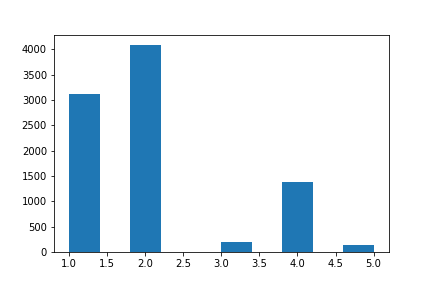

In [175]:
plt.figure(53)
plt.hist(data_6['Part'])
plt.show()

<IPython.core.display.Javascript object>


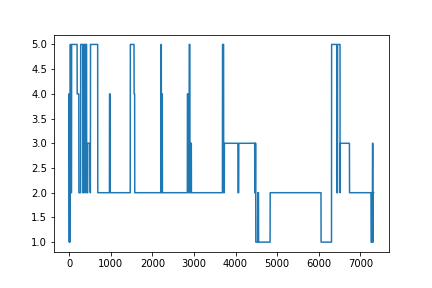

<function matplotlib.pyplot.show(*args, **kw)>

In [176]:
plt.figure(54)
plt.plot(range(len(data_7)), data_7.Part.values)#.hist()
plt.show

<IPython.core.display.Javascript object>


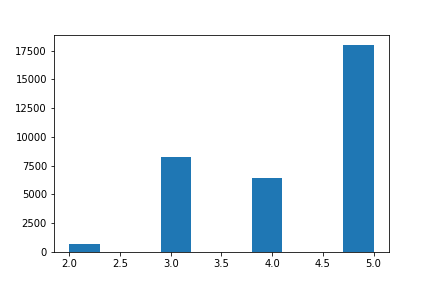

In [162]:
plt.figure(55)
plt.hist(data_7['Part'])
plt.show()

In [121]:
np.unique(data_1['Part'])

array(['B1012-278-1', 'B1012-278-4'], dtype=object)

In [122]:
np.unique(data_2['Part'])

array(['B1012-278-1', 'B1022-278-1'], dtype=object)

In [123]:
np.unique(data_3['Part'])

array(['B1012-278-1', 'B1012-278-2', 'B1012-278-3', 'B1012-278-4',
       'B1022-278-1'], dtype=object)

In [124]:
np.unique(data_4['Part'])

array(['B1012-278-1', 'B1022-278-1'], dtype=object)

In [125]:
np.unique(data_5['Part'])

array(['B1012-278-3', 'B1012-278-4'], dtype=object)

In [126]:
np.unique(data_6['Part'])

array(['B1012-278-1', 'B1012-278-2', 'B1012-278-3', 'B1012-278-4',
       'B1022-278-1'], dtype=object)

In [127]:
np.unique(data_7['Part'])

array(['B1012-278-1', 'B1012-278-2', 'B1012-278-3', 'B1012-278-4',
       'B1022-278-1'], dtype=object)

In [91]:
n_clusters_ = len(np.unique(df['cluster_label']))
defect_rates = [0 for x in range(n_clusters_)]
for i in range(n_clusters_):
    temp_df = df[ (df['cluster_label']==float(i)) ]
    defect_cluster = temp_df[  (temp_df['defect'] == 1) ]
    defect_rate = len(defect_cluster) / len(temp_df)
    defect_rates[i] = float("{:.2f}".format(defect_rate*100))  
    
print(defect_rates)

[1.56, 0.0, 2.27, 1.37, 4.85, 2.43, 2.39, 2.55]


In [93]:
n_clusters_ = len(np.unique(df['cluster_label']))
cluster_sizes = [0 for x in range(n_clusters_)]
for i in range(n_clusters_):
    temp_df = df[ (df['cluster_label']==float(i)) ]
    cluster_sizes[i] = len(temp_df)
    
print(cluster_sizes)

[33358, 2201, 28688, 1603, 16172, 9300, 8927, 7320]


(33358, 279)


<IPython.core.display.Javascript object>


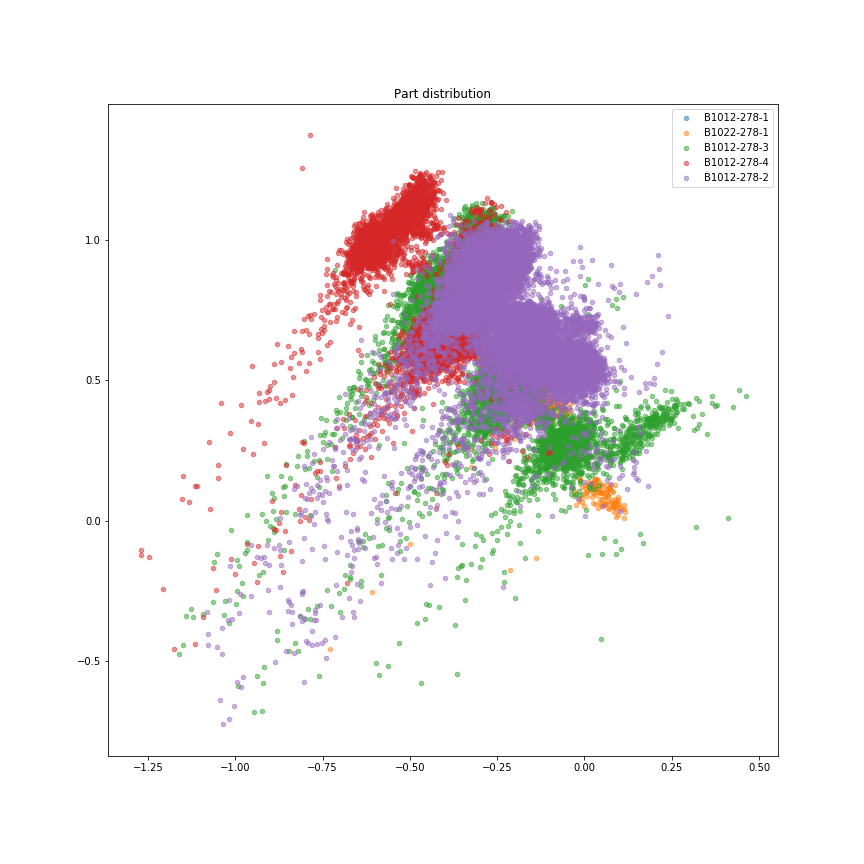

In [179]:
print(data_0.shape)
plot_targets(data_0)

(2201, 282)


<IPython.core.display.Javascript object>


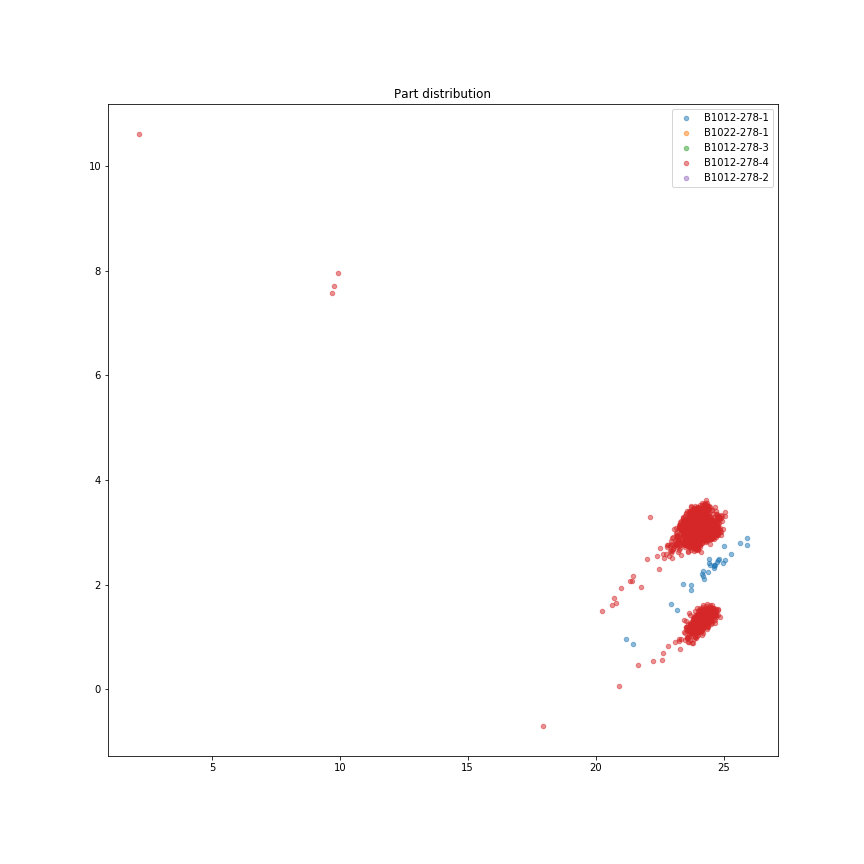

In [114]:
print(data_1.shape)
plot_targets(data_1)

(28688, 279)


<IPython.core.display.Javascript object>


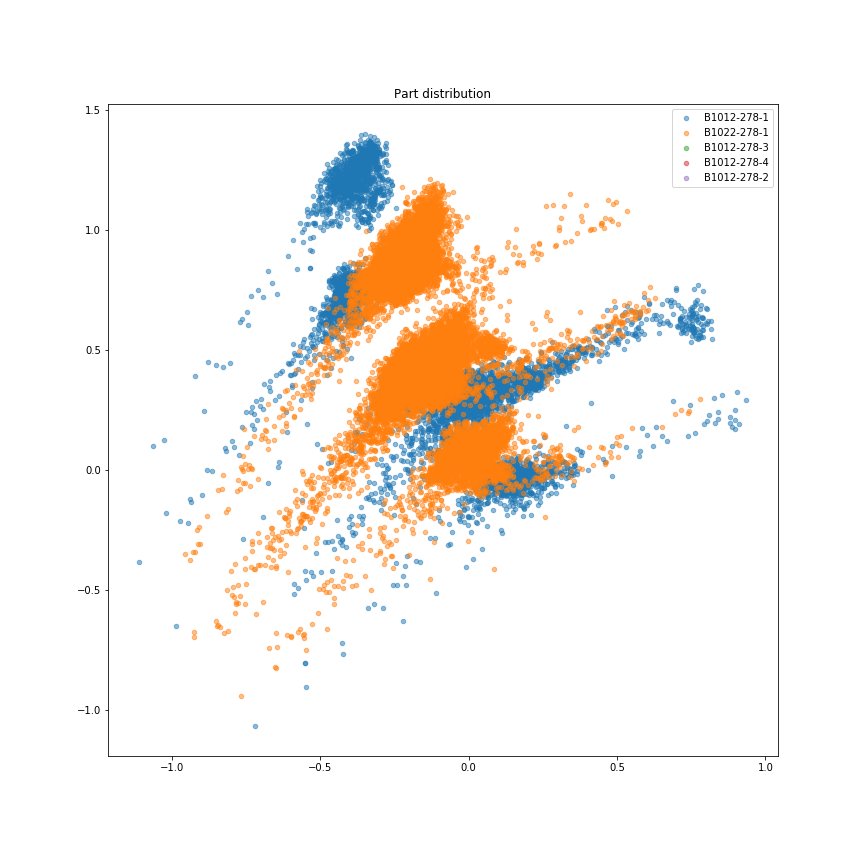

In [180]:
print(data_2.shape)
plot_targets(data_2)

(1603, 282)


<IPython.core.display.Javascript object>


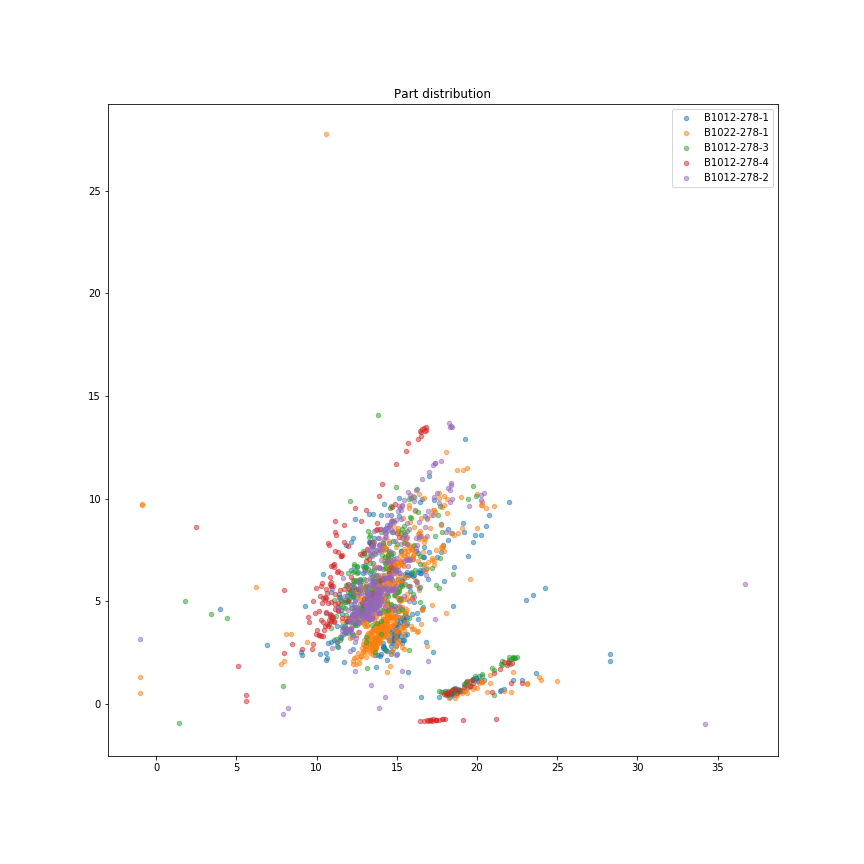

In [118]:
print(data_3.shape)
plot_targets(data_3)

(16172, 279)


<IPython.core.display.Javascript object>


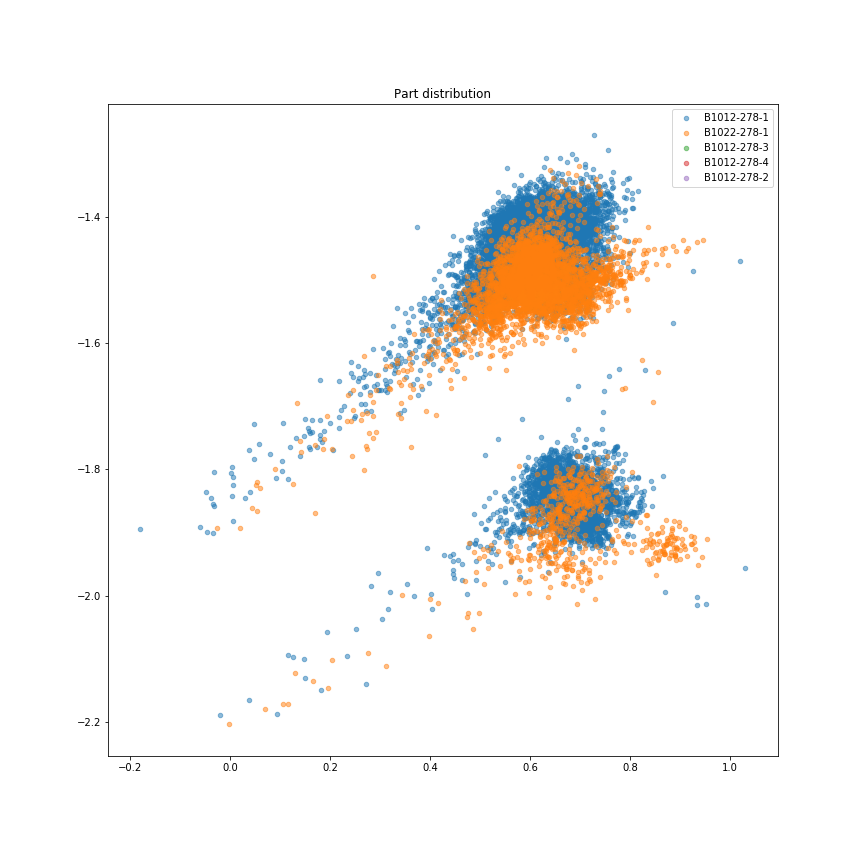

In [181]:
print(data_4.shape)
plot_targets(data_4)

(9300, 282)


<IPython.core.display.Javascript object>


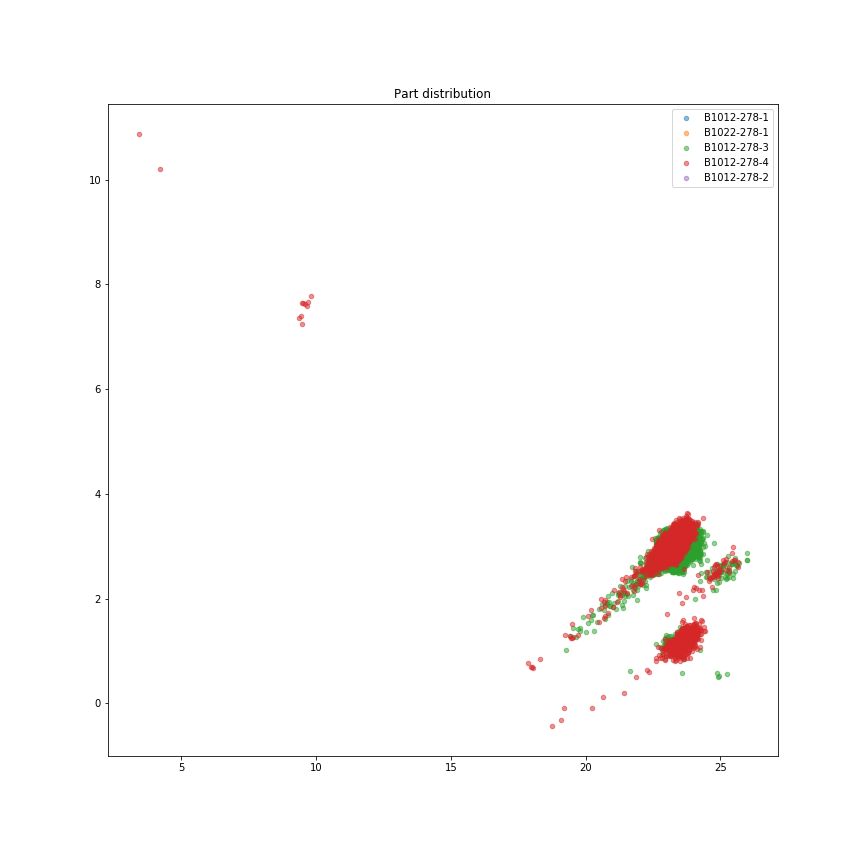

In [120]:
print(data_5.shape)
plot_targets(data_5)

(8927, 279)


<IPython.core.display.Javascript object>


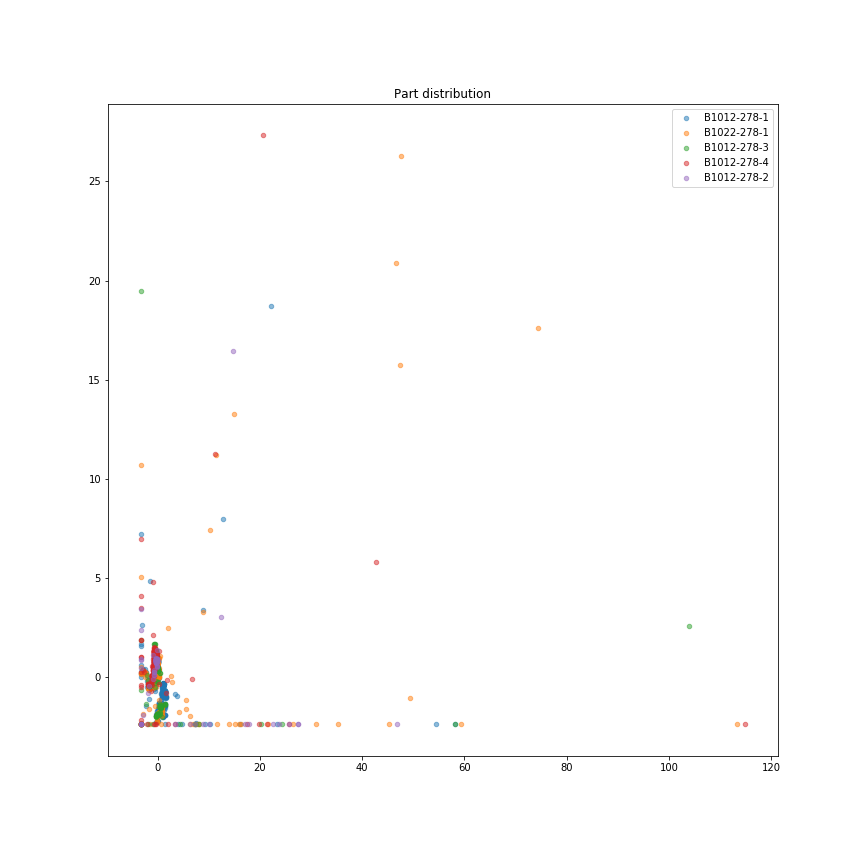

In [182]:
print(data_6.shape)
plot_targets(data_6)

(2201, 282)


<IPython.core.display.Javascript object>


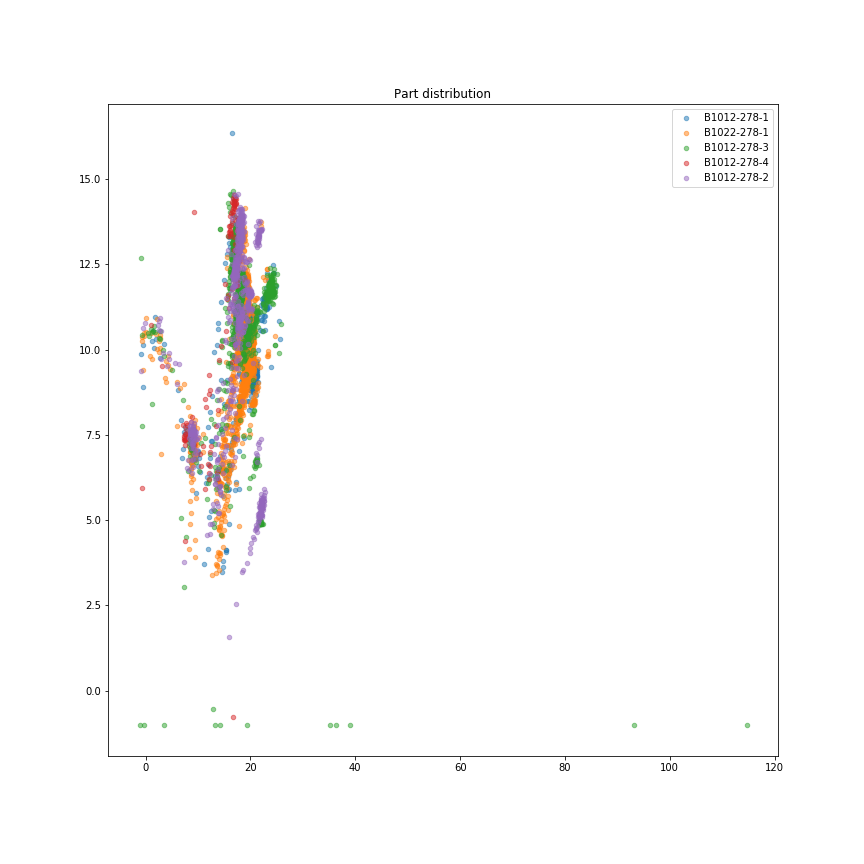

In [121]:
print(data_1.shape)
plot_targets(data_7)

In [100]:
part4_df = df[ (df['Part']=='B1012-278-4') ] 